## Проверка статистических гипотез

### Условие задачи

Руководство компании обратило внимание на то, что сотрудники старше 35 
лет болеют чаще, чем более молодые сотрудники. Кроме этого, среди мужчин 
количество пропусков рабочих дней в связи с больничным выше, чем среди женщин. 
В связи с этой ситуацией, руководство организации планирует ввести 
дополнительные медицинские осмотры среди групп риска. 
Вам необходимо проверить следующие гипотезы:
1) Мужчины пропускают в течение года более 2 рабочих дней (work_days) по 
болезни значимо чаще женщин.
2) Работники старше 35 лет (age) пропускают в течение года более 2 рабочих 
дней (work_days) по болезни значимо чаще своих более молодых коллег.

#### Подготовка к работе

Для начала импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Зафиксируем случайное состояние в константе.

In [2]:
RS = 322

#### Подготовка данных

Сохраним таблицу в переменную `data`. В данных выбрана кодировка Windows-1251, поэтому необходимо указать параметр `encoding='cp1251'`. Также, значения в столбцах заключены в кавычки, поэтому, для корректного разделения по столбцам, нужно указать параметр `quoting=3`. 

In [3]:
data = pd.read_csv('data.csv', encoding='cp1251', quoting=3)

Посмотрим на первые 5 строк в таблице:

In [4]:
data.head()

,"""Количество больничных дней","""""Возраст""""","""""Пол"""""""
0,"""5",39,"""""Ж"""""""
1,"""4",54,"""""М"""""""
2,"""4",26,"""""М"""""""
3,"""5",42,"""""М"""""""
4,"""4",29,"""""М"""""""


Можно увидеть, что в значениях и названиях столбцов остались кавычки. Для начала, приведём названия столбцов в корректный вид.

In [5]:
data.columns = ['days', 'age', 'gender']

От кавычек избавимся с помощью функции `apply()` и лямбда-функции, которая будет менять кавычки на пустую строку.

In [6]:
data['days'] = data['days'].apply(lambda x: x.replace('"', ''))
data['gender'] = data['gender'].apply(lambda x: x.replace('"', ''))

Заменим значения `'Ж'` и `'М'` на английские буквы: `'f'` и `'m'`.

In [7]:
data['gender'] = data['gender'].replace({'Ж':'f', 'М': 'm'})

In [8]:
data.head()

,days,age,gender
0,5,39,f
1,4,54,m
2,4,26,m
3,5,42,m
4,4,29,m


Теперь таблица выглядит приемлимо.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   days    237 non-null    object
 1   age     237 non-null    int64 
 2   gender  237 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.7+ KB


Столбец `'days'` имеет тип `'object'`. Нужно изменить его на целочисленный.

In [10]:
data['days'] = data['days'].astype('int64')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   days    237 non-null    int64 
 1   age     237 non-null    int64 
 2   gender  237 non-null    object
dtypes: int64(2), object(1)
memory usage: 5.7+ KB


Можно привести столбец `'gender'` к типу `int` или `bool`, но в решаемой задаче, в этом нет необходимости.

Дополнительно взглянем на статистики числовых признаков с помощью метода `describe()`.

In [12]:
data.describe()

,days,age
count,237.000000,237.000000
mean,3.257384,40.181435
std,1.807821,6.875157
min,0.000000,23.000000
25%,2.000000,36.000000
50%,3.000000,41.000000
75%,4.000000,45.000000
max,8.000000,60.000000


Можно заметить, что количество пропущенных дней варьируется от 0 до 8, а возраст сотрудников от 23 до 60 лет.

### Проверка первой гипотезы

Добавим дополнительный булевый столбец, указывающий на то, пропустил ли сотрудник больше, чем 2 дня по болезни за год.

In [13]:
data['more_than_two'] = data['days'] > 2

In [14]:
data.sample(5, random_state=RS)

,days,age,gender,more_than_two
45,7,52,m,True
187,1,47,f,False
171,4,49,m,True
186,2,38,f,False
123,8,33,m,True


Столбец сформировался корректно.

Создадим две переменные `group_m` и `group_f` с сотрудниками мужского и женского пола.

In [15]:
group_m = data.query('gender == "m"')

In [16]:
group_f = data.query('gender == "f"')

Построим гистограмы для количества пропущенных дней по каждому полу:

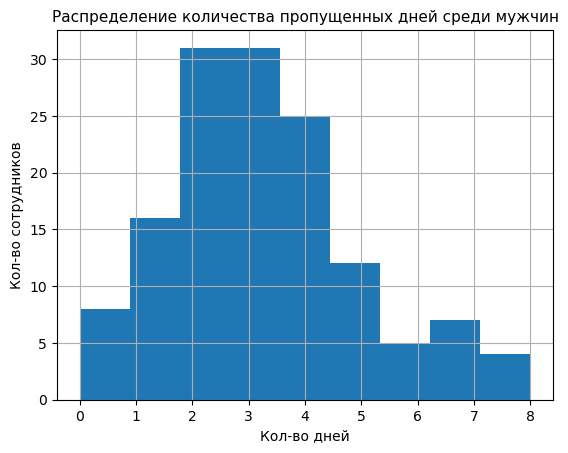

In [17]:
group_m['days'].hist(bins=9)
plt.title('Распределение количества пропущенных дней среди мужчин', {'fontsize': 11} )
plt.ylabel('Кол-во сотрудников')
plt.xlabel('Кол-во дней');

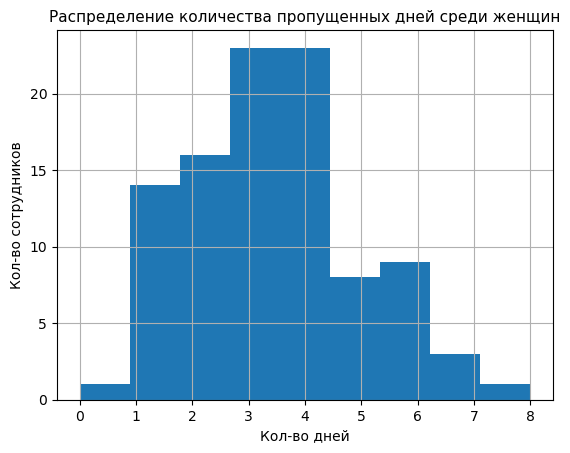

In [18]:
group_f['days'].hist(bins=9)
plt.title('Распределение количества пропущенных дней среди женщин', {'fontsize': 11} )
plt.ylabel('Кол-во сотрудников')
plt.xlabel('Кол-во дней');

Посмотрим на количество мужчин и женщин в выборке.

In [19]:
pd.DataFrame(data['gender'].value_counts().values, columns=['Кол-во сотрудников'], index=['Мужчина', 'Женщина'])

,Кол-во сотрудников
Мужчина,139
Женщина,98


Для проверки гипотезы, можем воспользоваться методом сравнения вероятности двух биномиальных распределений. В гипотезе нас интересуют только два события: 
* сотрудник пропустил более двух рабочих дней;
* сотрудник пропустил два и меньше рабочих дней.

Таким образом, можем заменить восемь различных вариантов двумя исходами. Соответственно, распределения пропущенных дней можно представить в виде биномиальных. 

Пусть событие $A$ - это пропуск сотрудником более двух дней за год по болезни. $p_1$ будет вероятностью события $A$ в первой генеральной совокупности (все сотрудники компании мужского пола), а $p_2$ - вероятность во второй генеральной совокупности (все сотрудники женского пола).  
Вероятности $p_1$ и $p_2$ нам неизвестны, но мы можем рассчитать относительные частоты по имеющимся данным:  
$\omega_1(A) = \frac{m_1}{n_1}, \omega_2(A) = \frac{m_2}{n_2},$ где $m_1, m_2$ - фактическое число появлений события $A$ в 1-й и во 2-й выборке (`group_m` и `group_f`).

Необходимо составить гипотезы.  
В качестве нулевой гипотезы выдвинем следующую гипотезу: 
* Мужчины и женщины пропускают более двух рабочих дней одинаково часто ($H_0: p_1 = p_2$),
  
а в качестве альтернативной:
* Мужчины пропускают в течение года более двух рабочих дней значимо чаще женщин ($H_2: p_1 > p_2$)

Для проверки гипотез нужно использовать следующий критерий:
$$U = \frac{\frac{m_1}{n_1} - \frac{m_2}{n_2}}{\sqrt{\frac{m_1 + m_2}{n_1 + n_2}(1 - \frac{m_1 + m_2}{n_1 + n_2})(\frac{1}{n_1} + \frac{1}{n_2})}}$$


Данный критерий сравнивается с критерием $u_\text{критическое}$. Критическое значение отыскивается из соотношения $\phi(u_\text{крит.}) = \frac {1 - 2\alpha}{2}$ для односторонней области, где $\alpha$ - выбранный уровень значимости, а $\phi(u)$ - функция Лапласа. 

Так как тест односторонний, если выполняется соотношение $U < u_\text{крит.}$, принимается гипотеза $H_0$, в обратном же случае, принимается $H_1$.

В качестве уровня значимости выберем $\alpha = 0.05$

Посчитаем значение функции Лапласа для нашего уровня значимости:
$$\phi(u_\text{крит.}) = \frac {1 - 2\alpha}{2}$$
$$\phi(u_\text{крит.}) = \frac {1 - 2 * 0.05}{2}$$
$$\phi(u_\text{крит.}) = 0.45$$

Значение аргумента $u_\text{крит.}$ можем взять из таблицы значений функции Лапласа:

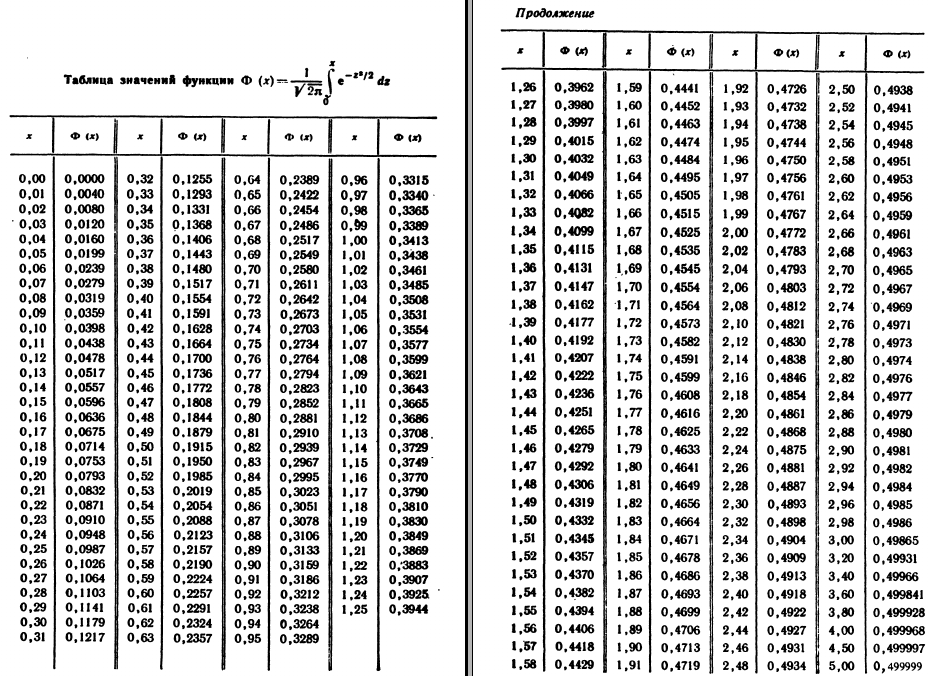



В нашем случае $u_\text{крит.} \approx 1.65$.

Запишем в переменные `m1`, `m2`, `n1` и `n2` значения из наших данных:

In [20]:
# функция для подсчёта коэффициентов m/n
def make_vars(df1, df2):
    m1 = df1.query('more_than_two').shape[0]
    m2 = df2.query('more_than_two').shape[0]
    n1 = df1.shape[0]
    n2 = df2.shape[0]
    return m1, m2, n1, n2

In [21]:
m1, m2, n1, n2 = make_vars(group_m, group_f)

Посчитаем критерий $U$ для наших выборок.

In [22]:
# функция для подсчёта критерия
def u_criteria(m_1, m_2, n_1, n_2):
    return ((m_1 / n_1 - m_2 / n_2) /
            np.sqrt((m_1 + m_2) / (n_1 + n_2) * (1 - (m_1 + m_2) / (n_1 + n_2)) * (1 / n_1 + 1 / n_2)))

In [23]:
u_criteria(m1, m2, n1, n2)

-1.2512431983794325

Так как $U < u_\text{крит.}$, принимаем гипотезу $H_0$ об отсутствии значимых отличий.

#### Вывод

Первую гипотезу о том, что мужчины пропускают более двух дней за год значимо чаще женщин мы отклоняем.

### Проверка второй гипотезы

Вторую гипотезу будем проверять аналогичным методом, так как гипотезы отличаются только характеристиками выборок (пол/возраст).

In [24]:
group_older = data.query('age >= 35') # неравенство сделал нестрогим, т.к. 35 с лишним лет, это, по идее "старше 35"
group_younger = data.query('age < 35')

Построим гистограмы для наших выборок.

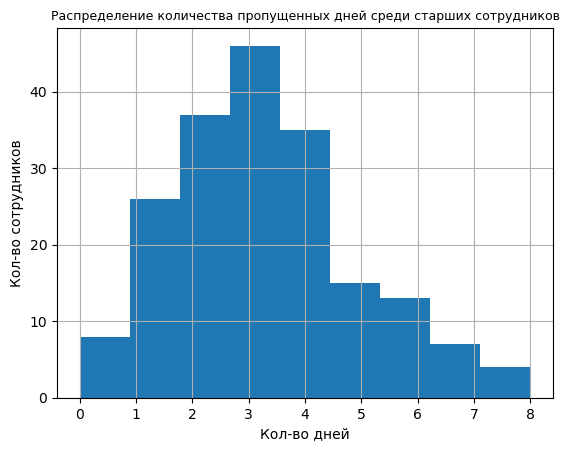

In [25]:
group_older['days'].hist(bins=9)
plt.title('Распределение количества пропущенных дней среди cтарших сотрудников', {'fontsize': 9} )
plt.ylabel('Кол-во сотрудников')
plt.xlabel('Кол-во дней');

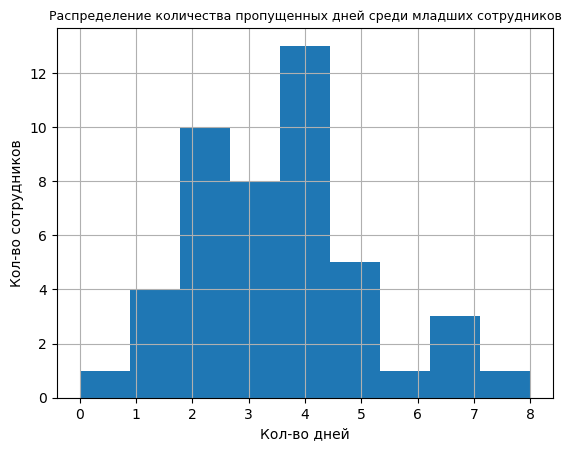

In [26]:
group_younger['days'].hist(bins=9)
plt.title('Распределение количества пропущенных дней среди младших сотрудников', {'fontsize': 9} )
plt.ylabel('Кол-во сотрудников')
plt.xlabel('Кол-во дней');

Посмотрим на количество людей в возрастных группах.

In [27]:
pd.DataFrame([[group_older.shape[0]],[group_younger.shape[0]]], columns=['Кол-во сотрудников'], index=['Старше 35', 'Младше 35'])

,Кол-во сотрудников
Старше 35,191
Младше 35,46


Можно заметить, что имеется существенный дисбаланс в количестве сотрудников. Однако, метод сравнения вероятности двух биномиальных распределений в таком случае также подходит.

Сформируем гипотезы:  

В качестве нулевой гипотезы выдвинем следующую гипотезу: 
* Сотрудники старше 35-ти лет и более молодые сотрудники пропускают более двух рабочих дней одинаково часто $(H_0: p_1 = p_2)$,
  
а в качестве альтернативной:
* Сотрудники старше 35-ти лет пропускают в течение года более двух рабочих дней значимо чаще своих младших коллег $(H_2: p_1 > p_2)$


Посчитаем коэффициенты `m1`, `m2`, `n1` и `n2`.

In [28]:
m1, m2, n1, n2 = make_vars(group_older, group_younger)

Так как уровень значимости оставляем таким же, как и в первой гипотезе $\alpha = 0.05$, значение критерия $u_\text{крит.}$ будет таким же: $u_\text{крит.} = 1.65$ 

Посчитаем критерий $U$:

In [29]:
u_criteria(m1, m2, n1, n2)

-0.5779433179621563

$U < u_\text{крит.}$, поэтому снова принимаем нулевую гипотезу.

#### Вывод 

Вторую гипотезу о статистически значимом отличии в пропусках между двумя возрастными группами также отклоняем.